From the "Supersolid symmetry breaking from compressional oscillations in a dipolar quantum gas" paper (link here [https://arxiv.org/abs/1906.02791](https://arxiv.org/abs/1906.02791)), the authors say:

"The equilibrium density configuration is found by fixing the equation parameters to the values available in the experiments, and then evolving the eGPE in imaginary time. We consider $\mathrm{N}=35000$ atoms of ${ }^{162} \mathrm{Dy}$, for which $a_{d d}=130 a_0\left(a_0\right.$ is the Bohr radius). The trapping frequencies are $\omega_{x, y, z}=2 \pi(18.5,53,81) \mathrm{Hz}$, and $a_s$ is changed to tune the value of $\epsilon_{d d}$."



# import modules

In [23]:
import matplotlib.pyplot as plt

# Import dependencies
import numpy as np
import sys
sys.path.append('../../../../3D-egpe-code/egpe')
from egpe import eGPE


In [24]:


# Define the parameters
nparticles = 35_000
fx, fy, fz = 18.5, 53, 81
# Harmonic oscillator length is given by a_ho = sqrt(hbar/(m*omega)), where m is the mass of the atom, and omega is the 2*pi*f0, where f0 is the frequency of the trap.
# We want to calculate a_h0 / r_0 = sqrt(hbar/(m*omega)/r_0, where r_0 = 390 a_0.
# a_h0/r_0 = sqrt(1.05457182e-34 m^2 kg / s / ( 162 * (1.66053907e-27 kilograms) * (2*pi*20 Hertz)) / (390 * 5.291772109E-11 m)= 1.7662456 microns / ((390 * 5.291772109E-11 m)) = 85.5825757
# a_h0_y = a_h0 * sqrt(18.5/53) = = 85.5825757 * sqrt(18.5/53) = 50.563052245
# a_h0_z = a_h0 * sqrt(18.5/81) = = 85.5825757 * sqrt(18.5/81) = 40.9005085201



# Get the optimal sr and sz
gp = eGPE(eps_dd=1.38,
          nparticles=nparticles,
          fx=fx, fy=fy, fz=fz,
          nxyz=np.array([256, 128, 64]) / 2,
          box_size=np.array([90, 50, 41]) * np.array([0.9, 0.75, 1]) * 50,
          # rho_cutoff=0.8,
          # z_cutoff=0.8,
          )

r0 = gp.box_size / 20
gp.psi = np.exp(-0.5 * (gp.x / r0[0])**2 - 0.5 * (gp.y / r0[1])**2 - 0.5 * (gp.z / r0[2])**2) + 0j
gp.psi *= np.random.normal(0.9, 1, gp.psi.shape)
gp.normalize_psi()


[INFO] Initializing random psi


In [25]:

gp.evolve(dt=10, 
          t_max=10*1E+04, 
          verbose=True, 
          print_each_percent=1, 
          output_root_dir="1-equilibrate-output")

[INFO] Created output directory:  1-equilibrate-output/snapshots_time_evolution_0


  0%|          | 1/10000 [00:00<17:04,  9.76it/s]

Kinetic energy:  83.48012806535183
Potential energy (external):  46.88990680657336
Potential energy (interaction):  97.72445797853754
Total energy:  228.09449285046273


  1%|          | 103/10000 [00:07<12:48, 12.88it/s]

Kinetic energy:  3.7998060441391477
Potential energy (external):  59.287902332962034
Potential energy (interaction):  37.45969078573498
Total energy:  100.54739916283616


  2%|▏         | 203/10000 [00:14<12:04, 13.52it/s]

Kinetic energy:  3.2895138791186995
Potential energy (external):  58.988001142739556
Potential energy (interaction):  36.91805174988326
Total energy:  99.19556677174151


  3%|▎         | 303/10000 [00:22<12:19, 13.12it/s]

Kinetic energy:  3.3656870790262694
Potential energy (external):  59.09556647200184
Potential energy (interaction):  36.470687855348785
Total energy:  98.9319414063769


  4%|▍         | 403/10000 [00:29<12:09, 13.16it/s]

Kinetic energy:  3.5487258741104397
Potential energy (external):  59.2241323812877
Potential energy (interaction):  36.05308450368868
Total energy:  98.82594275908681


  5%|▌         | 503/10000 [00:36<11:34, 13.68it/s]

Kinetic energy:  3.8060069617643526
Potential energy (external):  59.33904072935541
Potential energy (interaction):  35.61260691119628
Total energy:  98.75765460231605


  6%|▌         | 603/10000 [00:44<11:29, 13.64it/s]

Kinetic energy:  4.12660475617095
Potential energy (external):  59.44780022623013
Potential energy (interaction):  35.124775098991805
Total energy:  98.69918008139288


  7%|▋         | 703/10000 [00:51<11:16, 13.73it/s]

Kinetic energy:  4.482066023801728
Potential energy (external):  59.55310662007101
Potential energy (interaction):  34.6119656654655
Total energy:  98.64713830933823


  8%|▊         | 803/10000 [00:58<11:17, 13.58it/s]

Kinetic energy:  4.826462617586658
Potential energy (external):  59.65095200506091
Potential energy (interaction):  34.127315211049606
Total energy:  98.60472983369718


  9%|▉         | 903/10000 [01:05<12:11, 12.43it/s]

Kinetic energy:  5.127406452148096
Potential energy (external):  59.73872110596937
Potential energy (interaction):  33.70546534221566
Total energy:  98.57159290033313


 10%|█         | 1003/10000 [01:13<11:06, 13.49it/s]

Kinetic energy:  5.385175444501241
Potential energy (external):  59.81854814998409
Potential energy (interaction):  33.3394451515606
Total energy:  98.54316874604592


 11%|█         | 1103/10000 [01:20<11:10, 13.27it/s]

Kinetic energy:  5.621744836469324
Potential energy (external):  59.89524170051002
Potential energy (interaction):  32.99725376735999
Total energy:  98.51424030433934


 12%|█▏        | 1203/10000 [01:27<10:49, 13.54it/s]

Kinetic energy:  5.865470422500936
Potential energy (external):  59.9744834511825
Potential energy (interaction):  32.640526411966746
Total energy:  98.48048028565019


 13%|█▎        | 1303/10000 [01:34<10:42, 13.53it/s]

Kinetic energy:  6.142614205566633
Potential energy (external):  60.06162239183073
Potential energy (interaction):  32.23492771467245
Total energy:  98.43916431206982


 14%|█▍        | 1403/10000 [01:41<10:45, 13.33it/s]

Kinetic energy:  6.466789026409899
Potential energy (external):  60.15896635451554
Potential energy (interaction):  31.76573523835804
Total energy:  98.39149061928347


 15%|█▌        | 1503/10000 [01:49<10:24, 13.61it/s]

Kinetic energy:  6.820853364309651
Potential energy (external):  60.26129771841699
Potential energy (interaction):  31.26302777241929
Total energy:  98.34517885514593


 16%|█▌        | 1603/10000 [01:56<10:19, 13.55it/s]

Kinetic energy:  7.154354865461111
Potential energy (external):  60.356166429594495
Potential energy (interaction):  30.799575715658026
Total energy:  98.31009701071363


 17%|█▋        | 1703/10000 [02:03<10:05, 13.71it/s]

Kinetic energy:  7.421420396881284
Potential energy (external):  60.43366311732141
Potential energy (interaction):  30.433831814327686
Total energy:  98.28891532853038


 18%|█▊        | 1803/10000 [02:10<10:20, 13.21it/s]

Kinetic energy:  7.612624471298669
Potential energy (external):  60.49239481815358
Potential energy (interaction):  30.17250147696601
Total energy:  98.27752076641825


 19%|█▉        | 1903/10000 [02:18<10:02, 13.45it/s]

Kinetic energy:  7.7432825338610565
Potential energy (external):  60.53573312277946
Potential energy (interaction):  29.992341745789524
Total energy:  98.27135740243006


 20%|██        | 2003/10000 [02:25<09:48, 13.59it/s]

Kinetic energy:  7.83238037442206
Potential energy (external):  60.56766665915784
Potential energy (interaction):  29.867696818628403
Total energy:  98.2677438522083


 21%|██        | 2103/10000 [02:32<09:39, 13.63it/s]

Kinetic energy:  7.89431735180245
Potential energy (external):  60.59142431170503
Potential energy (interaction):  29.7796507632419
Total energy:  98.26539242674939


 22%|██▏       | 2203/10000 [02:39<09:38, 13.47it/s]

Kinetic energy:  7.938550546246841
Potential energy (external):  60.60935060881591
Potential energy (interaction):  29.715811725056504
Total energy:  98.26371288011924


 23%|██▎       | 2303/10000 [02:47<09:26, 13.59it/s]

Kinetic energy:  7.971061498073162
Potential energy (external):  60.62308258541993
Potential energy (interaction):  29.668283151475137
Total energy:  98.26242723496823


 24%|██▍       | 2403/10000 [02:54<09:15, 13.67it/s]

Kinetic energy:  7.995646959488931
Potential energy (external):  60.63375104567877
Potential energy (interaction):  29.631997071903406
Total energy:  98.26139507707111


 25%|██▌       | 2503/10000 [03:01<09:10, 13.62it/s]

Kinetic energy:  8.014764092480277
Potential energy (external):  60.642141119865286
Potential energy (interaction):  29.603633213834527
Total energy:  98.26053842618009


 26%|██▌       | 2603/10000 [03:08<09:25, 13.07it/s]

Kinetic energy:  8.030041425831781
Potential energy (external):  60.64880590251079
Potential energy (interaction):  29.580962203021937
Total energy:  98.25980953136451


 27%|██▋       | 2703/10000 [03:15<09:01, 13.48it/s]

Kinetic energy:  8.042582872544536
Potential energy (external):  60.65414260952374
Potential energy (interaction):  29.56245124426283
Total energy:  98.2591767263311


 28%|██▊       | 2803/10000 [03:23<09:01, 13.30it/s]

Kinetic energy:  8.053150550337643
Potential energy (external):  60.65844245332741
Potential energy (interaction):  29.547024881106914
Total energy:  98.25861788477198


 29%|██▉       | 2903/10000 [03:30<08:48, 13.43it/s]

Kinetic energy:  8.062277372339311
Potential energy (external):  60.661923180681576
Potential energy (interaction):  29.533916569619702
Total energy:  98.2581171226406


 30%|███       | 3003/10000 [03:38<08:42, 13.40it/s]

Kinetic energy:  8.070338543532062
Potential energy (external):  60.66475048915405
Potential energy (interaction):  29.52257390325571
Total energy:  98.25766293594182


 31%|███       | 3103/10000 [03:45<08:27, 13.58it/s]

Kinetic energy:  8.077598493687685
Potential energy (external):  60.66705236875278
Potential energy (interaction):  29.512596152904276
Total energy:  98.25724701534475


 32%|███▏      | 3203/10000 [03:52<08:23, 13.51it/s]

Kinetic energy:  8.084242702822038
Potential energy (external):  60.6689289213603
Potential energy (interaction):  29.50369179016347
Total energy:  98.2568634143458


 33%|███▎      | 3303/10000 [03:59<07:53, 14.13it/s]

Kinetic energy:  8.090399925968049
Potential energy (external):  60.67045924885991
Potential energy (interaction):  29.495648753109315
Total energy:  98.25650792793726


 34%|███▍      | 3401/10000 [04:06<09:23, 11.72it/s]

Kinetic energy:  8.096158103331868
Potential energy (external):  60.671706401981325
Potential energy (interaction):  29.4883131084699
Total energy:  98.2561776137831


 35%|███▌      | 3503/10000 [04:13<07:48, 13.87it/s]

Kinetic energy:  8.101575972978782
Potential energy (external):  60.67272101439876
Potential energy (interaction):  29.48157343235503
Total energy:  98.25587041973257


 36%|███▌      | 3603/10000 [04:20<07:39, 13.94it/s]

Kinetic energy:  8.106691662147675
Potential energy (external):  60.673544021715735
Potential energy (interaction):  29.4753492116809
Total energy:  98.2555848955443


 37%|███▋      | 3703/10000 [04:27<07:29, 14.02it/s]

Kinetic energy:  8.111529089781186
Potential energy (external):  60.67420872660304
Potential energy (interaction):  29.469582156938927
Total energy:  98.25531997332315


 38%|███▊      | 3803/10000 [04:34<07:25, 13.92it/s]

Kinetic energy:  8.11610274095558
Potential energy (external):  60.67474238527399
Potential energy (interaction):  29.464229678369943
Total energy:  98.25507480459952


 39%|███▉      | 3903/10000 [04:41<07:23, 13.76it/s]

Kinetic energy:  8.120421203586103
Potential energy (external):  60.67516743610821
Potential energy (interaction):  29.45926000428122
Total energy:  98.25484864397554


 40%|████      | 4003/10000 [04:48<07:13, 13.82it/s]

Kinetic energy:  8.12448974907456
Potential energy (external):  60.67550245622408
Potential energy (interaction):  29.454648565270713
Total energy:  98.25464077056935


 41%|████      | 4103/10000 [04:55<07:00, 14.02it/s]

Kinetic energy:  8.128312167819239
Potential energy (external):  60.675762908732054
Potential energy (interaction):  29.45037536293431
Total energy:  98.25445043948561


 42%|████▏     | 4203/10000 [05:03<06:48, 14.18it/s]

Kinetic energy:  8.13189202327183
Potential energy (external):  60.675961727770655
Potential energy (interaction):  29.446423105377548
Total energy:  98.25427685642003


 43%|████▎     | 4303/10000 [05:10<06:48, 13.94it/s]

Kinetic energy:  8.135233455447922
Potential energy (external):  60.67610977747277
Potential energy (interaction):  29.44277593643185
Total energy:  98.25411916935255


 44%|████▍     | 4403/10000 [05:17<06:49, 13.67it/s]

Kinetic energy:  8.138341640780421
Potential energy (external):  60.67621621303847
Potential energy (interaction):  29.439418618330173
Total energy:  98.25397647214908


 45%|████▌     | 4503/10000 [05:24<06:37, 13.83it/s]

Kinetic energy:  8.141222996428391
Potential energy (external):  60.67628876606598
Potential energy (interaction):  29.436336053274697
Total energy:  98.25384781576908


 46%|████▌     | 4603/10000 [05:31<06:28, 13.88it/s]

Kinetic energy:  8.143885201553303
Potential energy (external):  60.67633397157975
Potential energy (interaction):  29.433513050503514
Total energy:  98.25373222363658


 47%|████▋     | 4703/10000 [05:38<06:32, 13.50it/s]

Kinetic energy:  8.146337094539607
Potential energy (external):  60.67635735042275
Potential energy (interaction):  29.430934263590522
Total energy:  98.25362870855287


 48%|████▊     | 4803/10000 [05:45<06:13, 13.90it/s]

Kinetic energy:  8.148588493153907
Potential energy (external):  60.67636355761803
Potential energy (interaction):  29.428584238494068
Total energy:  98.25353628926601


 49%|████▉     | 4903/10000 [05:52<06:08, 13.84it/s]

Kinetic energy:  8.150649974031131
Potential energy (external):  60.67635650482048
Potential energy (interaction):  29.426447526598317
Total energy:  98.25345400544992


 50%|█████     | 5003/10000 [05:59<06:28, 12.86it/s]

Kinetic energy:  8.152532638627527
Potential energy (external):  60.676339462975704
Potential energy (interaction):  29.424508828762885
Total energy:  98.2533809303661


 51%|█████     | 5103/10000 [06:06<06:01, 13.53it/s]

Kinetic energy:  8.154247884908186
Potential energy (external):  60.676315149717205
Potential energy (interaction):  29.422753146258472
Total energy:  98.25331618088386


 52%|█████▏    | 5203/10000 [06:13<05:44, 13.93it/s]

Kinetic energy:  8.155807197539172
Potential energy (external):  60.67628580480137
Potential energy (interaction):  29.421165922492946
Total energy:  98.25325892483349


 53%|█████▎    | 5303/10000 [06:20<05:39, 13.84it/s]

Kinetic energy:  8.157221964174147
Potential energy (external):  60.676253255944474
Potential energy (interaction):  29.419733165738748
Total energy:  98.25320838585736


 54%|█████▍    | 5403/10000 [06:27<05:28, 13.99it/s]

Kinetic energy:  8.158503321460614
Potential energy (external):  60.67621897674477
Potential energy (interaction):  29.418441547846783
Total energy:  98.25316384605216


 55%|█████▌    | 5503/10000 [06:34<05:21, 13.98it/s]

Kinetic energy:  8.15966203149351
Potential energy (external):  60.67618413788226
Potential energy (interaction):  29.417278477372875
Total energy:  98.25312464674865


 56%|█████▌    | 5603/10000 [06:41<05:15, 13.92it/s]

Kinetic energy:  8.160708387449022
Potential energy (external):  60.67614965245475
Potential energy (interaction):  29.416232147888735
Total energy:  98.25309018779251


 57%|█████▋    | 5703/10000 [06:48<05:08, 13.91it/s]

Kinetic energy:  8.161652145865794
Potential energy (external):  60.6761162160881
Potential energy (interaction):  29.415291563719293
Total energy:  98.25305992567318


 58%|█████▊    | 5803/10000 [06:55<05:01, 13.94it/s]

Kinetic energy:  8.16250248234066
Potential energy (external):  60.676084342318866
Potential energy (interaction):  29.414446546155137
Total energy:  98.25303337081466


 59%|█████▉    | 5903/10000 [07:02<05:03, 13.49it/s]

Kinetic energy:  8.16326796712421
Potential energy (external):  60.67605439366586
Potential energy (interaction):  29.4136877235113
Total energy:  98.25301008430137


 60%|██████    | 6003/10000 [07:10<04:56, 13.48it/s]

Kinetic energy:  8.163956557113524
Potential energy (external):  60.67602660875515
Potential energy (interaction):  29.413006508391792
Total energy:  98.25298967426046


 61%|██████    | 6103/10000 [07:17<04:42, 13.80it/s]

Kinetic energy:  8.16457560094449
Potential energy (external):  60.676001125842625
Potential energy (interaction):  29.41239506529846
Total energy:  98.25297179208557


 62%|██████▏   | 6203/10000 [07:24<04:37, 13.68it/s]

Kinetic energy:  8.165131854204956
Potential energy (external):  60.675978003056976
Potential energy (interaction):  29.4118462713758
Total energy:  98.25295612863772


 63%|██████▎   | 6303/10000 [07:31<04:27, 13.83it/s]

Kinetic energy:  8.1656315021656
Potential energy (external):  60.67595723567983
Potential energy (interaction):  29.41135367268485
Total energy:  98.25294241053028


 64%|██████▍   | 6403/10000 [07:38<04:15, 14.05it/s]

Kinetic energy:  8.166080187815869
Potential energy (external):  60.67593877076643
Potential energy (interaction):  29.410911437986755
Total energy:  98.25293039656906


 65%|██████▌   | 6503/10000 [07:45<04:14, 13.76it/s]

Kinetic energy:  8.166483043370338
Potential energy (external):  60.67592251940088
Potential energy (interaction):  29.410514311628532
Total energy:  98.25291987439975


 66%|██████▌   | 6603/10000 [07:52<04:03, 13.95it/s]

Kinetic energy:  8.166844723760159
Potential energy (external):  60.675908366863794
Potential energy (interaction):  29.41015756676557
Total energy:  98.25291065738952


 67%|██████▋   | 6703/10000 [07:59<03:56, 13.95it/s]

Kinetic energy:  8.167169440935067
Potential energy (external):  60.67589618097511
Potential energy (interaction):  29.409836959849244
Total energy:  98.25290258175941


 68%|██████▊   | 6803/10000 [08:06<03:53, 13.72it/s]

Kinetic energy:  8.16746099807048
Potential energy (external):  60.67588581885463
Potential energy (interaction):  29.409548687044538
Total energy:  98.25289550396964


 69%|██████▉   | 6903/10000 [08:13<03:42, 13.95it/s]

Kinetic energy:  8.167722823002176
Potential energy (external):  60.67587713232439
Potential energy (interaction):  29.4092893430282
Total energy:  98.25288929835477


 70%|███████   | 7003/10000 [08:20<03:37, 13.80it/s]

Kinetic energy:  8.167958000399222
Potential energy (external):  60.67586997215393
Potential energy (interaction):  29.40905588244308
Total energy:  98.25288385499624


 71%|███████   | 7103/10000 [08:27<03:37, 13.31it/s]

Kinetic energy:  8.16816930233929
Potential energy (external):  60.675864191330156
Potential energy (interaction):  29.40884558415018
Total energy:  98.25287907781961


 72%|███████▏  | 7203/10000 [08:34<03:22, 13.80it/s]

Kinetic energy:  8.168359217072416
Potential energy (external):  60.675859647512965
Potential energy (interaction):  29.408656018315845
Total energy:  98.25287488290124


 73%|███████▎  | 7303/10000 [08:41<03:13, 13.96it/s]

Kinetic energy:  8.168529975855227
Potential energy (external):  60.675856204816455
Potential energy (interaction):  29.40848501629353
Total energy:  98.2528711969652


 74%|███████▍  | 7403/10000 [08:48<03:07, 13.86it/s]

Kinetic energy:  8.168683577810434
Potential energy (external):  60.67585373503878
Potential energy (interaction):  29.40833064320531
Total energy:  98.25286795605453


 75%|███████▌  | 7503/10000 [08:55<03:00, 13.81it/s]

Kinetic energy:  8.168821812821946
Potential energy (external):  60.6758521184465
Potential energy (interaction):  29.408191173091396
Total energy:  98.25286510435984


 76%|███████▌  | 7603/10000 [09:02<02:54, 13.76it/s]

Kinetic energy:  8.16894628251553
Potential energy (external):  60.67585124420284
Potential energy (interaction):  29.408065066470574
Total energy:  98.25286259318894


 77%|███████▋  | 7703/10000 [09:09<02:48, 13.61it/s]

Kinetic energy:  8.169058419403099
Potential energy (external):  60.67585101051632
Potential energy (interaction):  29.407950950142446
Total energy:  98.25286038006186


 78%|███████▊  | 7803/10000 [09:16<02:38, 13.88it/s]

Kinetic energy:  8.169159504287602
Potential energy (external):  60.67585132457358
Potential energy (interaction):  29.407847599056804
Total energy:  98.25285842791799


 79%|███████▉  | 7903/10000 [09:23<02:29, 14.03it/s]

Kinetic energy:  8.169250682036438
Potential energy (external):  60.67585210230957
Potential energy (interaction):  29.407753920076242
Total energy:  98.25285670442226


 80%|████████  | 8003/10000 [09:30<02:20, 14.25it/s]

Kinetic energy:  8.169332975837413
Potential energy (external):  60.67585326805872
Potential energy (interaction):  29.407668937462322
Total energy:  98.25285518135846


 81%|████████  | 8103/10000 [09:37<02:17, 13.81it/s]

Kinetic energy:  8.169407300052931
Potential energy (external):  60.675854754122305
Potential energy (interaction):  29.40759177992401
Total energy:  98.25285383409926


 82%|████████▏ | 8203/10000 [09:44<02:12, 13.59it/s]

Kinetic energy:  8.16947447178622
Potential energy (external):  60.67585650028214
Potential energy (interaction):  29.40752166907649
Total energy:  98.25285264114484


 83%|████████▎ | 8303/10000 [09:51<02:02, 13.89it/s]

Kinetic energy:  8.169535221270376
Potential energy (external):  60.675858453281215
Potential energy (interaction):  29.407457909167796
Total energy:  98.25285158371938


 84%|████████▍ | 8403/10000 [09:58<01:55, 13.78it/s]

Kinetic energy:  8.169590201185493
Potential energy (external):  60.67586056629132
Potential energy (interaction):  29.40739987794325
Total energy:  98.25285064542007


 85%|████████▌ | 8503/10000 [10:06<01:51, 13.37it/s]

Kinetic energy:  8.169639995003294
Potential energy (external):  60.67586279838034
Potential energy (interaction):  29.407347018527588
Total energy:  98.25284981191122


 86%|████████▌ | 8603/10000 [10:13<01:41, 13.71it/s]

Kinetic energy:  8.16968512445222
Potential energy (external):  60.675865113990625
Potential energy (interaction):  29.40729883221588
Total energy:  98.25284907065873


 87%|████████▋ | 8703/10000 [10:20<01:34, 13.70it/s]

Kinetic energy:  8.169726056188816
Potential energy (external):  60.6758674824346
Potential energy (interaction):  29.407254872073764
Total energy:  98.25284841069718


 88%|████████▊ | 8803/10000 [10:27<01:26, 13.80it/s]

Kinetic energy:  8.169763207754942
Potential energy (external):  60.67586987741537
Potential energy (interaction):  29.407214737259167
Total energy:  98.25284782242949


 89%|████████▉ | 8903/10000 [10:34<01:19, 13.87it/s]

Kinetic energy:  8.169796952893126
Potential energy (external):  60.67587227657344
Potential energy (interaction):  29.40717806798356
Total energy:  98.25284729745013


 90%|█████████ | 9003/10000 [10:41<01:11, 13.94it/s]

Kinetic energy:  8.169827626286535
Potential energy (external):  60.675874661064285
Potential energy (interaction):  29.407144541042836
Total energy:  98.25284682839366


 91%|█████████ | 9103/10000 [10:48<01:04, 13.93it/s]

Kinetic energy:  8.169855527783508
Potential energy (external):  60.67587701516578
Potential energy (interaction):  29.407113865851702
Total energy:  98.25284640880099


 92%|█████████▏| 9203/10000 [10:55<01:06, 11.97it/s]

Kinetic energy:  8.169880926161149
Potential energy (external):  60.67587932591695
Potential energy (interaction):  29.407085780926355
Total energy:  98.25284603300445


 93%|█████████▎| 9303/10000 [11:02<00:51, 13.60it/s]

Kinetic energy:  8.169904062477348
Potential energy (external):  60.67588158278709
Potential energy (interaction):  29.407060050762254
Total energy:  98.2528456960267


 94%|█████████▍| 9403/10000 [11:09<00:42, 14.03it/s]

Kinetic energy:  8.169925153055157
Potential energy (external):  60.67588377737468
Potential energy (interaction):  29.40703646306375
Total energy:  98.25284539349359


 95%|█████████▌| 9503/10000 [11:17<00:36, 13.69it/s]

Kinetic energy:  8.16994439213967
Potential energy (external):  60.6758859031342
Potential energy (interaction):  29.407014826283678
Total energy:  98.25284512155756


 96%|█████████▌| 9603/10000 [11:24<00:29, 13.58it/s]

Kinetic energy:  8.169961954262911
Potential energy (external):  60.67588795513043
Potential energy (interaction):  29.40699496743859
Total energy:  98.25284487683193


 97%|█████████▋| 9703/10000 [11:31<00:21, 14.01it/s]

Kinetic energy:  8.16997799634875
Potential energy (external):  60.67588992981706
Potential energy (interaction):  29.406976730166836
Total energy:  98.25284465633264


 98%|█████████▊| 9803/10000 [11:38<00:14, 13.95it/s]

Kinetic energy:  8.169992659586502
Potential energy (external):  60.67589182483921
Potential energy (interaction):  29.40695997300233
Total energy:  98.25284445742804


 99%|█████████▉| 9903/10000 [11:45<00:07, 13.81it/s]

Kinetic energy:  8.170006071098666
Potential energy (external):  60.67589363885744
Potential energy (interaction):  29.406944567838995
Total energy:  98.25284427779509


100%|██████████| 10000/10000 [11:52<00:00, 14.04it/s]


In [26]:
gp.energy_contributions(), sum(gp.energy_contributions().values())

({'kinetic': 8.170018227963645,
  'pot_ext': 60.675895354469326,
  'pot_int': 29.40693053449339},
 98.25284411692635)

In [27]:
x, den_x = gp.coordinate_slice(axis="x"), gp.density_slice(axis="x")
y, den_y = gp.coordinate_slice(axis="y"), gp.density_slice(axis="y")
z, den_z = gp.coordinate_slice(axis="z"), gp.density_slice(axis="z")

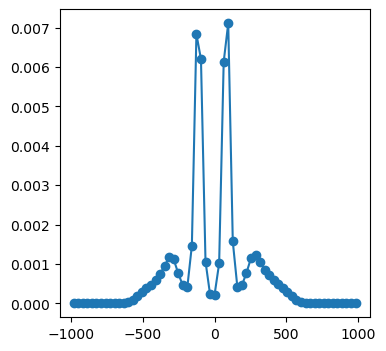

In [28]:

#plot the density
plt.figure(figsize=(4, 4))
x_lim = (x > -1000) & (x < 1000)
plt.plot(x[x_lim], den_x[x_lim], label="x", marker="o")


You can see that the density is not symmetric. This is because the initial conditions are not symmetric. For more accuracy, you can try to make the initial conditions symmetric.

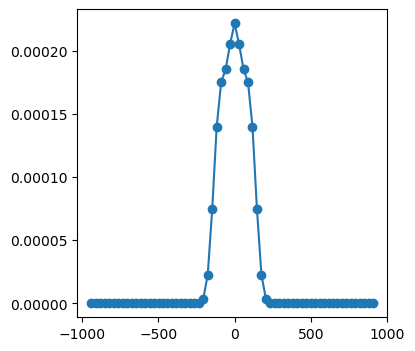

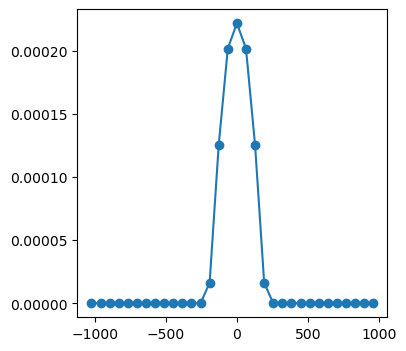

In [29]:


# plot the density
plt.figure(figsize=(4, 4))
plt.plot(y, den_y, label="y", marker="o")

# plot the density
plt.figure(figsize=(4, 4))
plt.plot(z, den_z, label="z", marker="o")

In [30]:

gp.save("1-equilibrate-output")

Saving gp object to gp.pickle
